# Airline Statistics | Communicate Data Findings

## Table of Contents
- [Introduction](#intro)
- [Step 1: Install Libraries](#import)
- [Step 2: Gathering Data](#gather)
- [Step 3: Assessing Data](#assess)
- [Step 4: Cleaning Data](#cleaningdata)
- [Step 5: Storing, Analysing, and Visualizing Data](#workwithdata)
- [Step 6: Machine Learning Model](#machinelearning)

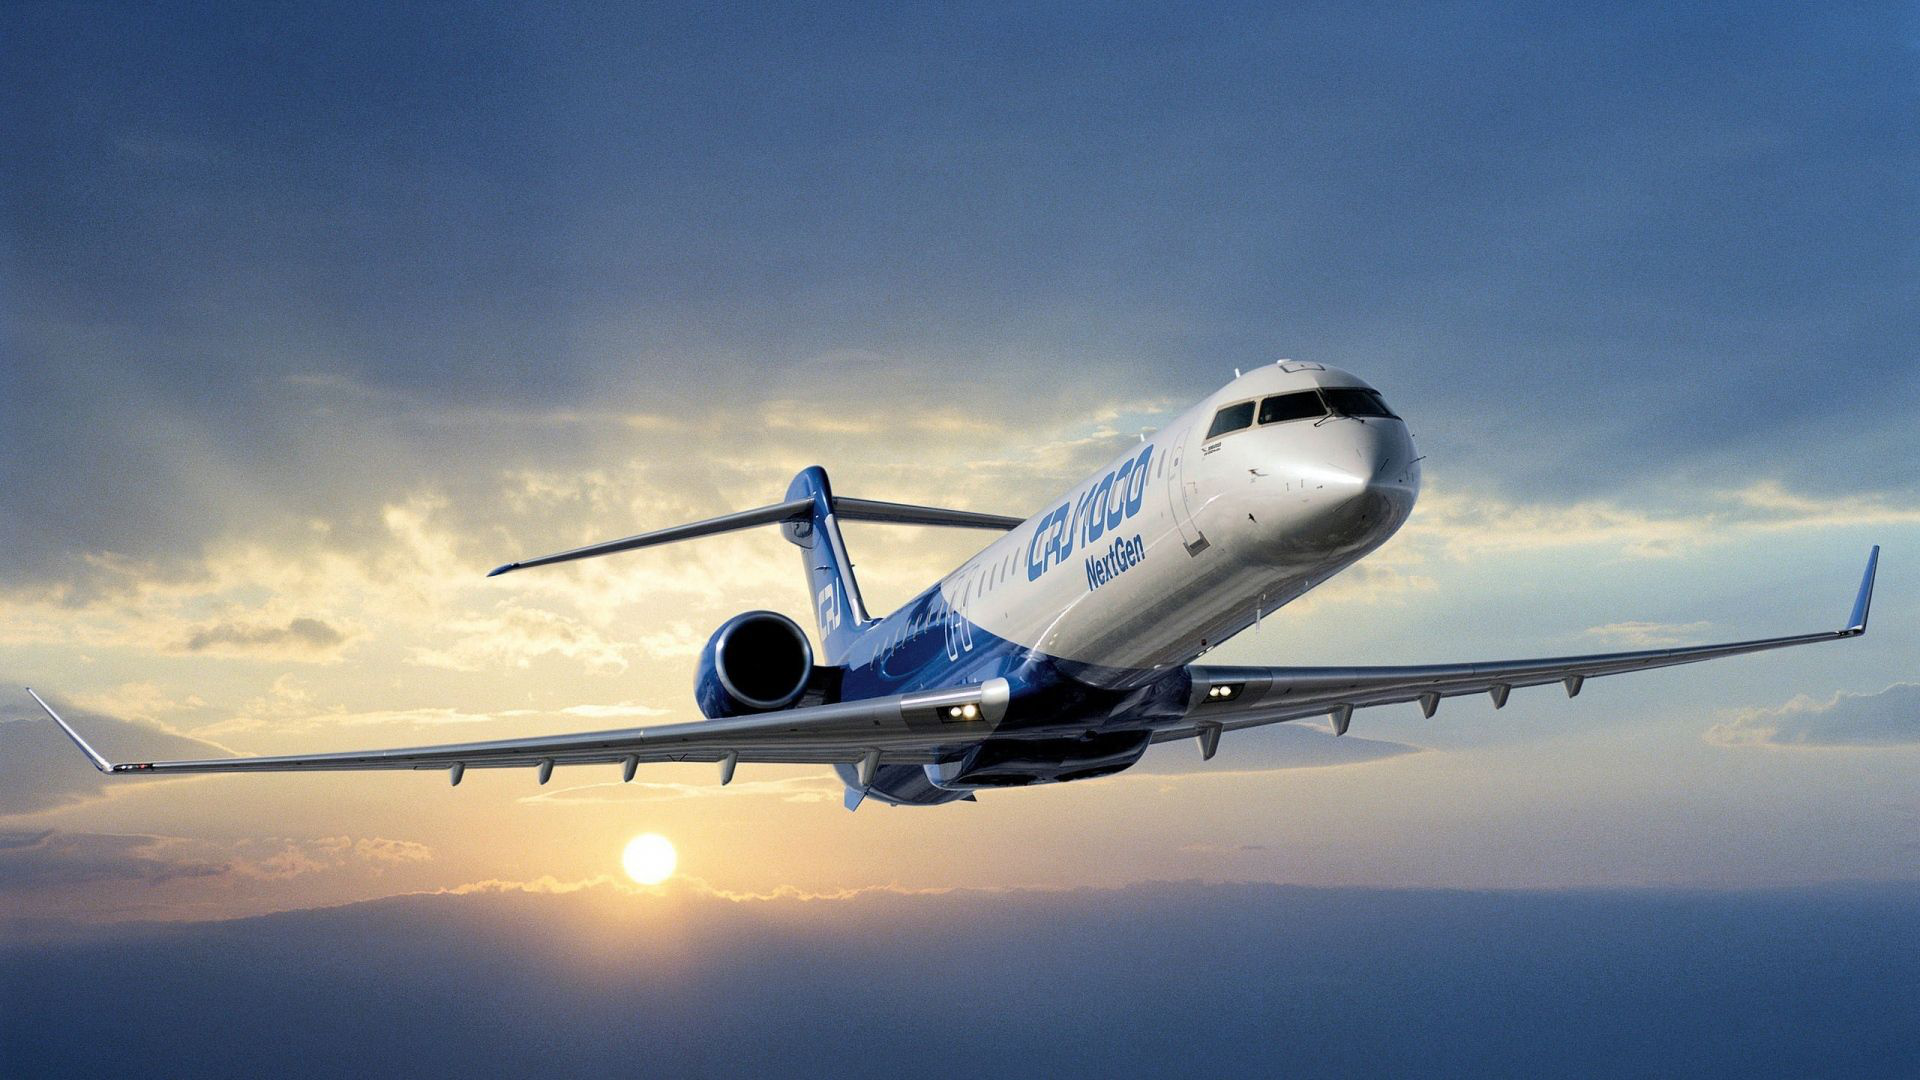

In [1]:
from PIL import Image # Library for importing images
Image.open('images/airline_cover.jpg')

<a id='intro'></a>
## Introduction
This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

**Table column descriptions:**

In [2]:
import pandas as pd
pd.read_csv('misc_data/master/variable-descriptions_master.csv')

,name,description
0,Year,1987-2008
1,Month,12-Jan
2,DayofMonth,31-Jan
3,DayOfWeek,1 (Monday) - 7 (Sunday)
4,DepTime,"actual departure time (local, hhmm)"
5,CRSDepTime,"scheduled departure time (local, hhmm)"
6,ArrTime,"actual arrival time (local, hhmm)"
7,CRSArrTime,"scheduled arrival time (local, hhmm)"
8,UniqueCarrier,unique carrier code
9,FlightNum,flight number


<a id='import'></a>
## Step 1: Import 📚

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import markdown

# Display dataframe all columns
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

**References:** \
https://unicode.org/emoji/charts/full-emoji-list.html \
https://getemoji.com/

<a id='gatherdata'></a>
## Step 2: Gather 💾

First, we need to import the supporting data in the `misc_data` folder. We cleaned this data earlier in a seperate notebook so we won't have to fix any issues here 😃.

### 2.1. Gathering Data

#### Flights Data

In [4]:
# 89-91' flight data
df8991 = pd.read_csv('dataset/1989-1991.csv')

#### Miscellaneous Data

In [5]:
# misc_data folder
airports = pd.read_csv('misc_data/master/airports_master.csv')
carriers = pd.read_csv('misc_data/master/carriers_master.csv')
plane_data = pd.read_csv('misc_data/master/plane-data_master.csv')
var_desc = pd.read_csv('misc_data/master/variable-descriptions_master.csv')

<a id='assess'></a>
## Step 3: Assess 🔎

#### Open

In [6]:
df89.iloc[0:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.0,1230,1742.0,1552,UA,183,NaN,323.0,322,NaN,110.0,109.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1989,1,24,2,1255.0,1230,1612.0,1552,UA,183,NaN,317.0,322,NaN,20.0,25.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1989,1,25,3,1230.0,1230,1533.0,1552,UA,183,NaN,303.0,322,NaN,-19.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1989,1,26,4,1230.0,1230,1523.0,1552,UA,183,NaN,293.0,322,NaN,-29.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1989,1,27,5,1232.0,1230,1513.0,1552,UA,183,NaN,281.0,322,NaN,-39.0,2.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1989,1,28,6,1228.0,1230,1550.0,1552,UA,183,NaN,322.0,322,NaN,-2.0,-2.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1989,1,29,7,1639.0,1230,1942.0,1552,UA,183,NaN,303.0,322,NaN,230.0,249.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1989,1,30,1,1231.0,1230,1531.0,1552,UA,183,NaN,300.0,322,NaN,-21.0,1.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1989,1,31,2,1405.0,1230,1827.0,1552,UA,183,NaN,382.0,322,NaN,155.0,95.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1989,1,2,1,1057.0,1045,1537.0,1554,UA,184,NaN,160.0,189,NaN,-17.0,12.0,DEN,IAD,1452.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df90.iloc[0:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,1,3,3,1707.0,1630,1755.0,1723,US,29,NaN,48.0,53,NaN,32.0,37.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,1,4,4,1706.0,1630,1807.0,1723,US,29,NaN,61.0,53,NaN,44.0,36.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,1,5,5,1629.0,1630,1715.0,1723,US,29,NaN,46.0,53,NaN,-8.0,-1.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,1,6,6,1633.0,1630,1718.0,1723,US,29,NaN,45.0,53,NaN,-5.0,3.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,1,8,1,1630.0,1630,1726.0,1723,US,29,NaN,56.0,53,NaN,3.0,0.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1990,1,9,2,1734.0,1630,1818.0,1723,US,29,NaN,44.0,53,NaN,55.0,64.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1990,1,10,3,1634.0,1630,1723.0,1723,US,29,NaN,49.0,53,NaN,0.0,4.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1990,1,11,4,1745.0,1630,1833.0,1723,US,29,NaN,48.0,53,NaN,70.0,75.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1990,1,12,5,1650.0,1630,1742.0,1723,US,29,NaN,52.0,53,NaN,19.0,20.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1990,1,13,6,1629.0,1630,1716.0,1723,US,29,NaN,47.0,53,NaN,-7.0,-1.0,CMH,IND,182.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df91.iloc[0:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1991,1,1,2,1709.0,1705,1944.0,1944,US,112,NaN,155.0,159,NaN,0.0,4.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1991,1,2,3,1704.0,1705,1946.0,1944,US,112,NaN,162.0,159,NaN,2.0,-1.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1991,1,3,4,1705.0,1705,1934.0,1944,US,112,NaN,149.0,159,NaN,-10.0,0.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1991,1,4,5,1709.0,1705,1951.0,1944,US,112,NaN,162.0,159,NaN,7.0,4.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1991,1,5,6,1703.0,1705,1936.0,1944,US,112,NaN,153.0,159,NaN,-8.0,-2.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1991,1,6,7,1711.0,1705,1949.0,1944,US,112,NaN,158.0,159,NaN,5.0,6.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1991,1,7,1,1711.0,1705,1946.0,1944,US,112,NaN,155.0,159,NaN,2.0,6.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1991,1,8,2,1704.0,1705,1934.0,1944,US,112,NaN,150.0,159,NaN,-10.0,-1.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1991,1,9,3,1805.0,1705,2042.0,1944,US,112,NaN,157.0,159,NaN,58.0,60.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1991,1,10,4,1703.0,1705,1946.0,1944,US,112,NaN,163.0,159,NaN,2.0,-2.0,TPA,SYR,1104.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


#### Info

In [9]:
df89.info(verbose=True, null_counts=True) # Verbose flag required to display row counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041200 entries, 0 to 5041199
Data columns (total 29 columns):
Year                 5041200 non-null int64
Month                5041200 non-null int64
DayofMonth           5041200 non-null int64
DayOfWeek            5041200 non-null int64
DepTime              4967035 non-null float64
CRSDepTime           5041200 non-null int64
ArrTime              4952196 non-null float64
CRSArrTime           5041200 non-null int64
UniqueCarrier        5041200 non-null object
FlightNum            5041200 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    4952196 non-null float64
CRSElapsedTime       5041200 non-null int64
AirTime              0 non-null float64
ArrDelay             4952196 non-null float64
DepDelay             4967035 non-null float64
Origin               5041200 non-null object
Dest                 5041200 non-null object
Distance             5014212 non-null float64
TaxiIn               0 non-null float64
Taxi

In [10]:
df90.info(verbose=True, null_counts=True) # Verbose flag required to display row counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270893 entries, 0 to 5270892
Data columns (total 29 columns):
Year                 5270893 non-null int64
Month                5270893 non-null int64
DayofMonth           5270893 non-null int64
DayOfWeek            5270893 non-null int64
DepTime              5218435 non-null float64
CRSDepTime           5270893 non-null int64
ArrTime              5202481 non-null float64
CRSArrTime           5270893 non-null int64
UniqueCarrier        5270893 non-null object
FlightNum            5270893 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    5202481 non-null float64
CRSElapsedTime       5270893 non-null int64
AirTime              0 non-null float64
ArrDelay             5202481 non-null float64
DepDelay             5218435 non-null float64
Origin               5270893 non-null object
Dest                 5270893 non-null object
Distance             5177456 non-null float64
TaxiIn               0 non-null float64
Taxi

In [11]:
df91.info(verbose=True, null_counts=True) # Verbose flag required to display row counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076925 entries, 0 to 5076924
Data columns (total 29 columns):
Year                 5076925 non-null int64
Month                5076925 non-null int64
DayofMonth           5076925 non-null int64
DayOfWeek            5076925 non-null int64
DepTime              5033420 non-null float64
CRSDepTime           5076925 non-null int64
ArrTime              5020835 non-null float64
CRSArrTime           5076925 non-null int64
UniqueCarrier        5076925 non-null object
FlightNum            5076925 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    5020835 non-null float64
CRSElapsedTime       5076925 non-null int64
AirTime              0 non-null float64
ArrDelay             5020835 non-null float64
DepDelay             5033420 non-null float64
Origin               5076925 non-null object
Dest                 5076925 non-null object
Distance             5050664 non-null float64
TaxiIn               0 non-null float64
Taxi

#### Columns

In [12]:
# Listing the columns
list(df89)

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [13]:
# Displaying count of null columns
any_null_columns_df89 = df89.columns[df89.isnull().any()]
all_null_columns_df89 = df89.columns[df89.isnull().all()]
df89[any_null_columns_df89].isnull().sum()

DepTime                74165
ArrTime                89004
TailNum              5041200
ActualElapsedTime      89004
AirTime              5041200
ArrDelay               89004
DepDelay               74165
Distance               26988
TaxiIn               5041200
TaxiOut              5041200
CancellationCode     5041200
CarrierDelay         5041200
WeatherDelay         5041200
NASDelay             5041200
SecurityDelay        5041200
LateAircraftDelay    5041200
dtype: int64

In [14]:
# Listing null columns with all values null
list(df89[any_null_columns_df89].isnull())

['DepTime',
 'ArrTime',
 'TailNum',
 'ActualElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'CancellationCode',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [15]:
# Listing null columns with all values null
list(df89[all_null_columns_df89].isnull())

['TailNum',
 'AirTime',
 'TaxiIn',
 'TaxiOut',
 'CancellationCode',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [16]:
# Checking if all columns are equal
list(df89) == list(df90) == list(df91)

True

In [17]:
df89['Origin'].value_counts().head()

ORD    261259
DFW    228360
ATL    224036
LAX    163487
DEN    138407
Name: Origin, dtype: int64

In [18]:
df89['Dest'].value_counts().head()

ORD    266877
DFW    233061
ATL    224590
LAX    162763
DEN    139573
Name: Dest, dtype: int64

In [19]:
# DepTime under 4 digits
df89[df89['DepTime'] < 999].count()

Year                 1326988
Month                1326988
DayofMonth           1326988
DayOfWeek            1326988
DepTime              1326988
CRSDepTime           1326988
ArrTime              1322535
CRSArrTime           1326988
UniqueCarrier        1326988
FlightNum            1326988
TailNum                    0
ActualElapsedTime    1322535
CRSElapsedTime       1326988
AirTime                    0
ArrDelay             1322535
DepDelay             1326988
Origin               1326988
Dest                 1326988
Distance             1319568
TaxiIn                     0
TaxiOut                    0
Cancelled            1326988
CancellationCode           0
Diverted             1326988
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

#### Missing Data

In [20]:
df89.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5041200.0,5.041200e+06,5.041200e+06,5.041200e+06,4.967035e+06,5.041200e+06,4.952196e+06,5.041200e+06,5.041200e+06,0.0,4.952196e+06,5.041200e+06,0.0,4.952196e+06,4.967035e+06,5.014212e+06,0.0,0.0,5.041200e+06,0.0,5.041200e+06,0.0,0.0,0.0,0.0,0.0
mean,1989.0,6.518804e+00,1.570836e+01,3.956539e+00,1.364867e+03,1.356045e+03,1.497378e+03,1.496717e+03,7.738888e+02,NaN,1.074756e+02,1.070360e+02,NaN,8.406396e+00,8.202822e+00,6.182918e+02,NaN,NaN,1.471177e-02,NaN,2.943545e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,3.469415e+00,8.781560e+00,1.993352e+00,4.781290e+02,4.714241e+02,4.973314e+02,4.852212e+02,5.822731e+02,NaN,6.365394e+01,6.323671e+01,NaN,2.522940e+01,2.359518e+01,5.134621e+02,NaN,NaN,1.203966e-01,NaN,5.417454e-02,NaN,NaN,NaN,NaN,NaN
min,1989.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,-5.910000e+02,-6.000000e+01,NaN,-1.263000e+03,-6.620000e+02,0.000000e+00,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1989.0,3.000000e+00,8.000000e+00,2.000000e+00,9.430000e+02,9.350000e+02,1.119000e+03,1.118000e+03,3.250000e+02,NaN,6.300000e+01,6.300000e+01,NaN,-4.000000e+00,0.000000e+00,2.580000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1989.0,7.000000e+00,1.600000e+01,4.000000e+00,1.341000e+03,1.335000e+03,1.523000e+03,1.521000e+03,6.400000e+02,NaN,8.800000e+01,8.700000e+01,NaN,3.000000e+00,0.000000e+00,4.460000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1989.0,1.000000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.743000e+03,1.921000e+03,1.916000e+03,1.103000e+03,NaN,1.360000e+02,1.350000e+02,NaN,1.300000e+01,8.000000e+00,8.390000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1989.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,9.368000e+03,NaN,1.494000e+03,1.555000e+03,NaN,1.356000e+03,1.646000e+03,4.502000e+03,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [21]:
df90.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5270893.0,5.270893e+06,5.270893e+06,5.270893e+06,5.218435e+06,5.270893e+06,5.202481e+06,5.270893e+06,5.270893e+06,0.0,5.202481e+06,5.270893e+06,0.0,5.202481e+06,5.218435e+06,5.177456e+06,0.0,0.0,5.270893e+06,0.0,5.270893e+06,0.0,0.0,0.0,0.0,0.0
mean,1990.0,6.533415e+00,1.571024e+01,3.936585e+00,1.359884e+03,1.353156e+03,1.494577e+03,1.496092e+03,7.526129e+02,NaN,1.105281e+02,1.104377e+02,NaN,6.809947e+00,6.909441e+00,6.325263e+02,NaN,NaN,9.952393e-03,NaN,3.026812e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,3.430091e+00,8.789473e+00,1.991932e+00,4.807011e+02,4.742856e+02,4.999035e+02,4.882286e+02,5.527238e+02,NaN,6.476856e+01,6.420680e+01,NaN,2.500846e+01,2.253737e+01,5.201425e+02,NaN,NaN,9.926402e-02,NaN,5.493315e-02,NaN,NaN,NaN,NaN,NaN
min,1990.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,-3.600000e+01,-5.500000e+01,NaN,-1.437000e+03,-9.230000e+02,1.100000e+01,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1990.0,4.000000e+00,8.000000e+00,2.000000e+00,9.360000e+02,9.300000e+02,1.116000e+03,1.116000e+03,3.260000e+02,NaN,6.500000e+01,6.500000e+01,NaN,-5.000000e+00,-1.000000e+00,2.680000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1990.0,7.000000e+00,1.600000e+01,4.000000e+00,1.339000e+03,1.332000e+03,1.523000e+03,1.523000e+03,6.340000e+02,NaN,9.100000e+01,9.000000e+01,NaN,1.000000e+00,0.000000e+00,4.530000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1990.0,1.000000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.740000e+03,1.920000e+03,1.916000e+03,1.075000e+03,NaN,1.400000e+02,1.400000e+02,NaN,1.100000e+01,5.000000e+00,8.610000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1990.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,9.851000e+03,NaN,1.883000e+03,1.565000e+03,NaN,1.438000e+03,1.439000e+03,4.502000e+03,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [22]:
df91.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5076925.0,5.076925e+06,5.076925e+06,5.076925e+06,5.033420e+06,5.076925e+06,5.020835e+06,5.076925e+06,5.076925e+06,0.0,5.020835e+06,5.076925e+06,0.0,5.020835e+06,5.033420e+06,5.050664e+06,0.0,0.0,5.076925e+06,0.0,5.076925e+06,0.0,0.0,0.0,0.0,0.0
mean,1991.0,6.511292e+00,1.570294e+01,3.925192e+00,1.348714e+03,1.342781e+03,1.493618e+03,1.494059e+03,7.757880e+02,NaN,1.116378e+02,1.125019e+02,NaN,4.736445e+00,5.753782e+00,6.461880e+02,NaN,NaN,8.569163e-03,NaN,2.478863e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,3.426552e+00,8.774474e+00,1.988417e+00,4.744904e+02,4.692350e+02,4.898275e+02,4.812070e+02,5.302326e+02,NaN,6.480231e+01,6.458729e+01,NaN,2.247487e+01,2.061102e+01,5.215105e+02,NaN,NaN,9.217231e-02,NaN,4.972644e-02,NaN,NaN,NaN,NaN,NaN
min,1991.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,-3.800000e+01,-5.900000e+01,NaN,-1.410000e+03,-1.084000e+03,1.100000e+01,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1991.0,4.000000e+00,8.000000e+00,2.000000e+00,9.310000e+02,9.300000e+02,1.116000e+03,1.115000e+03,3.520000e+02,NaN,6.500000e+01,6.700000e+01,NaN,-6.000000e+00,-1.000000e+00,2.800000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1991.0,7.000000e+00,1.600000e+01,4.000000e+00,1.333000e+03,1.330000e+03,1.521000e+03,1.520000e+03,6.770000e+02,NaN,9.300000e+01,9.200000e+01,NaN,0.000000e+00,0.000000e+00,4.750000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1991.0,9.000000e+00,2.300000e+01,6.000000e+00,1.739000e+03,1.730000e+03,1.916000e+03,1.913000e+03,1.130000e+03,NaN,1.420000e+02,1.430000e+02,NaN,9.000000e+00,4.000000e+00,8.700000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1991.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,4.788000e+03,NaN,1.490000e+03,1.517000e+03,NaN,1.188000e+03,1.439000e+03,4.502000e+03,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [23]:
df89['Year'].value_counts()

1989    5041200
Name: Year, dtype: int64

In [24]:
df90['Year'].value_counts()

1990    5270893
Name: Year, dtype: int64

In [25]:
df91['Year'].value_counts()

1991    5076925
Name: Year, dtype: int64

In [26]:
df89[df89['DepTime'].notnull()].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.0,1230,1742.0,1552,UA,183,NaN,323.0,322,NaN,110.0,109.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1989,1,24,2,1255.0,1230,1612.0,1552,UA,183,NaN,317.0,322,NaN,20.0,25.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1989,1,25,3,1230.0,1230,1533.0,1552,UA,183,NaN,303.0,322,NaN,-19.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1989,1,26,4,1230.0,1230,1523.0,1552,UA,183,NaN,293.0,322,NaN,-29.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1989,1,27,5,1232.0,1230,1513.0,1552,UA,183,NaN,281.0,322,NaN,-39.0,2.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1989,1,28,6,1228.0,1230,1550.0,1552,UA,183,NaN,322.0,322,NaN,-2.0,-2.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1989,1,29,7,1639.0,1230,1942.0,1552,UA,183,NaN,303.0,322,NaN,230.0,249.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1989,1,30,1,1231.0,1230,1531.0,1552,UA,183,NaN,300.0,322,NaN,-21.0,1.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1989,1,31,2,1405.0,1230,1827.0,1552,UA,183,NaN,382.0,322,NaN,155.0,95.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1989,1,2,1,1057.0,1045,1537.0,1554,UA,184,NaN,160.0,189,NaN,-17.0,12.0,DEN,IAD,1452.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [27]:
df89[df89['DepTime'].isnull()].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
732,1989,1,6,5,NaN,615,NaN,649,UA,204,NaN,NaN,34,NaN,NaN,NaN,MKE,ORD,67.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
900,1989,1,9,1,NaN,1100,NaN,1200,UA,207,NaN,NaN,120,NaN,NaN,NaN,RIC,ORD,642.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1063,1989,1,1,7,NaN,1400,NaN,2001,UA,212,NaN,NaN,241,NaN,NaN,NaN,LAX,ORD,1745.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1067,1989,1,5,4,NaN,1400,NaN,2001,UA,212,NaN,NaN,241,NaN,NaN,NaN,LAX,ORD,1745.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1074,1989,1,14,6,NaN,1400,NaN,2001,UA,212,NaN,NaN,241,NaN,NaN,NaN,LAX,ORD,1745.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1160,1989,1,7,6,NaN,630,NaN,915,UA,216,NaN,NaN,105,NaN,NaN,NaN,DEN,DFW,641.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1178,1989,1,28,6,NaN,630,NaN,915,UA,216,NaN,NaN,105,NaN,NaN,NaN,DEN,DFW,641.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1227,1989,1,20,5,NaN,1030,NaN,1143,UA,219,NaN,NaN,133,NaN,NaN,NaN,EWR,ORD,719.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1273,1989,1,6,5,NaN,1130,NaN,1422,UA,220,NaN,NaN,112,NaN,NaN,NaN,ORD,PHL,678.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1275,1989,1,8,7,NaN,1130,NaN,1422,UA,220,NaN,NaN,112,NaN,NaN,NaN,ORD,PHL,678.0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN


#### Quality
##### `df89` table
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` have incorrect values under 999 which need to be padded to 4 digits
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` are float and or need to be in `pd.to_datetime` format, some also have .0 at the end
- `ArrDelay` and `DepDelay` are float and need to be in integer
- Missing data in `DepTime`, `ArrTime`, `TailNum`, `ActualElapsedTime`, `AirTime`, `ArrDelay`, `DepDelay`, `Distance`, `TaxiIn`, `TaxiOut`, `CancellationCode`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`

##### `df90` table
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` have incorrect values under 999 which need to be padded to 4 digits
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` are float and or need to be in `pd.to_datetime` format, some also have .0 at the end
- `ArrDelay` and `DepDelay` are float and need to be in integer
- Missing data in `DepTime`, `ArrTime`, `TailNum`, `ActualElapsedTime`, `AirTime`, `ArrDelay`, `DepDelay`, `Distance`, `TaxiIn`, `TaxiOut`, `CancellationCode`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`

##### `df91` table
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` have incorrect values under 999 which need to be padded to 4 digits
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` are float and or need to be in `pd.to_datetime` format, some also have .0 at the end
- `ArrDelay` and `DepDelay` are float and need to be in integer
- Missing data in `DepTime`, `ArrTime`, `TailNum`, `ActualElapsedTime`, `AirTime`, `ArrDelay`, `DepDelay`, `Distance`, `TaxiIn`, `TaxiOut`, `CancellationCode`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`

#### Tidiness
- `df89`, `df90`, `df91` should all be merged into a single dataframe
- Add timestamp column consisting of `Year`, `Month`, `DayofMonth` , `DayOfWeek`
- Rename `DayofMonth` column to `DayOfMonth`

<a id='assess'></a>
## Step 4: Clean 🧹

#### Copy

In [28]:
df89_clean = df89.copy()
df90_clean = df90.copy()
df91_clean = df91.copy()

#### Tidiness
#### `df89`, `df90`, `df91`: should all be merged into a single dataframe

##### Define

Use `pd.concat` to merge `df89`, `df90`, `df91`.

##### Code

In [29]:
# Merge 89-91' datasets together
df8991 = pd.concat([df89_clean, df90_clean, df91_clean])

##### Test

In [30]:
df8991.info(verbose=True, null_counts=True) # Verbose flag required to display row counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15389018 entries, 0 to 5076924
Data columns (total 29 columns):
Year                 15389018 non-null int64
Month                15389018 non-null int64
DayofMonth           15389018 non-null int64
DayOfWeek            15389018 non-null int64
DepTime              15218890 non-null float64
CRSDepTime           15389018 non-null int64
ArrTime              15175512 non-null float64
CRSArrTime           15389018 non-null int64
UniqueCarrier        15389018 non-null object
FlightNum            15389018 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    15175512 non-null float64
CRSElapsedTime       15389018 non-null int64
AirTime              0 non-null float64
ArrDelay             15175512 non-null float64
DepDelay             15218890 non-null float64
Origin               15389018 non-null object
Dest                 15389018 non-null object
Distance             15242332 non-null float64
TaxiIn               0 non

In [31]:
df8991.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.0,1230,1742.0,1552,UA,183,NaN,323.0,322,NaN,110.0,109.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1989,1,24,2,1255.0,1230,1612.0,1552,UA,183,NaN,317.0,322,NaN,20.0,25.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1989,1,25,3,1230.0,1230,1533.0,1552,UA,183,NaN,303.0,322,NaN,-19.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1989,1,26,4,1230.0,1230,1523.0,1552,UA,183,NaN,293.0,322,NaN,-29.0,0.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1989,1,27,5,1232.0,1230,1513.0,1552,UA,183,NaN,281.0,322,NaN,-39.0,2.0,SFO,HNL,2398.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


#### Quality

####  Missing data in: `DepTime`, `ArrTime`, `TailNum`, `ActualElapsedTime`, `AirTime`, `ArrDelay`, `DepDelay`, `Distance`, `TaxiIn`, `TaxiOut`, `CancellationCode`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`

##### Define

Drop rows including missing data from `df8991` using `.dropna`

##### Code

In [32]:
# Removing columns where all values are null
df8991.dropna(how='all', axis=1, inplace=True)

# Removing row where any values are null
df8991.dropna(how='any', axis=0, inplace=True)

##### Test

In [33]:
df8991.info(verbose=True, null_counts=True) # Verbose flag required to display row counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031014 entries, 0 to 5076924
Data columns (total 19 columns):
Year                 15031014 non-null int64
Month                15031014 non-null int64
DayofMonth           15031014 non-null int64
DayOfWeek            15031014 non-null int64
DepTime              15031014 non-null float64
CRSDepTime           15031014 non-null int64
ArrTime              15031014 non-null float64
CRSArrTime           15031014 non-null int64
UniqueCarrier        15031014 non-null object
FlightNum            15031014 non-null int64
ActualElapsedTime    15031014 non-null float64
CRSElapsedTime       15031014 non-null int64
ArrDelay             15031014 non-null float64
DepDelay             15031014 non-null float64
Origin               15031014 non-null object
Dest                 15031014 non-null object
Distance             15031014 non-null float64
Cancelled            15031014 non-null int64
Diverted             15031014 non-null int64
dtypes: float64(

#### `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` have incorrect values under 999 which need to be padded to 4 digits

##### Define

Fix the times under 999 or 3 digit values by appending a single 0 to the front or two for times with 2 digits.

##### Code

In [34]:
# Showing `DepTime` values between 10-99 as they are only 3 digits
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']][df8991['DepTime'].between(10, 99)].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
39,40.0,2230,742.0,515
398,16.0,20,759.0,718
399,22.0,20,814.0,718
400,16.0,20,732.0,718
401,21.0,20,748.0,718


In [35]:
# Showing `DepTime` values between 0-9 as they are only 2 digits
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']][df8991['DepTime'].between(0, 9)].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
12796,4.0,5,501.0,524
17143,1.0,2205,45.0,2303
21569,5.0,2235,43.0,2308
21590,6.0,2350,545.0,529
21591,8.0,2350,548.0,529


In [36]:
# Showing `DepTime` values between 0-9 as they are only 2 digits
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']][df8991['DepTime'].between(0, 0)].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime


In [37]:
# Finding the min value
df8991['DepTime'].min()

1.0

In [38]:
# Finding the max value
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].max()

DepTime       2400.0
CRSDepTime    2400.0
ArrTime       2400.0
CRSArrTime    2400.0
dtype: float64

In [39]:
# Add 00's to the end of the times
df8991['DepTime'] = df8991['DepTime'].astype(str).str.pad(6, side ='left', fillchar ='0')
df8991['ArrTime'] = df8991['ArrTime'].astype(str).str.pad(6, side ='left', fillchar ='0')
df8991['CRSDepTime'] = df8991['CRSDepTime'].astype(str).str.pad(4, side ='left', fillchar ='0')
df8991['CRSArrTime'] = df8991['CRSArrTime'].astype(str).str.pad(4, side ='left', fillchar ='0')

In [40]:
# Change 2400 hours to 0000 hours
df8991['DepTime'] = df8991['DepTime'].replace(['2400.0'],'0000.0')
df8991['ArrTime'] = df8991['ArrTime'].replace(['2400.0'],'0000.0')
df8991['CRSDepTime'] = df8991['CRSDepTime'].replace(['2400'],'0000')
df8991['CRSArrTime'] = df8991['CRSArrTime'].replace(['2400'],'0000')

##### Test

In [41]:
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].iloc[397:401]

,DepTime,CRSDepTime,ArrTime,CRSArrTime
397,1338.0,1340,1547.0,1609
398,0016.0,0020,0759.0,0718
399,0022.0,0020,0814.0,0718
400,0016.0,0020,0732.0,0718


In [42]:
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].min()

DepTime       0.0
CRSDepTime    0.0
ArrTime       0.0
CRSArrTime    0.0
dtype: float64

In [43]:
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].max()

DepTime       2359.0
CRSDepTime    2359.0
ArrTime       2359.0
CRSArrTime    2359.0
dtype: float64

#### `df8991`: `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` are float and or need to be in pd.datetime format, some also have .0 at the end

##### Define

Convert `df8991` columns to `pd.to_datetime` format and remove .0 at the end.

##### Code

In [44]:
# Checking the columns
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].iloc[99:101]

,DepTime,CRSDepTime,ArrTime,CRSArrTime
99,0626.0,0625,1002.0,0951
100,0624.0,0625,0943.0,0951


In [45]:
# Checking data types
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].dtypes

DepTime       object
CRSDepTime    object
ArrTime       object
CRSArrTime    object
dtype: object

In [46]:
# Convert data types to string
df8991[['CRSDepTime', 'ArrTime', 'CRSArrTime']] = df8991[['CRSDepTime', 'ArrTime', 'CRSArrTime']].astype(str)

In [47]:
# Remove .0 from end of timestamps
df8991['DepTime'] = df8991['DepTime'].str[:-2]
df8991['ArrTime'] = df8991['ArrTime'].str[:-2]

In [48]:
# Checking the columns again
df8991[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].iloc[99:101]

,DepTime,CRSDepTime,ArrTime,CRSArrTime
99,0626,0625,1002,0951
100,0624,0625,0943,0951


In [49]:
# Changing from string to datetime
df8991['DepTime'] = pd.to_datetime(df8991['DepTime'], format='%H%M').dt.time
df8991['ArrTime'] = pd.to_datetime(df8991['ArrTime'], format='%H%M').dt.time
df8991['CRSDepTime'] = pd.to_datetime(df8991['CRSDepTime'], format='%H%M').dt.time
df8991['CRSArrTime'] = pd.to_datetime(df8991['CRSArrTime'], format='%H%M').dt.time

In [50]:
df8991.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1989,1,23,1,14:19:00,12:30:00,17:42:00,15:52:00,UA,183,323.0,322,110.0,109.0,SFO,HNL,2398.0,0,0
1,1989,1,24,2,12:55:00,12:30:00,16:12:00,15:52:00,UA,183,317.0,322,20.0,25.0,SFO,HNL,2398.0,0,0
2,1989,1,25,3,12:30:00,12:30:00,15:33:00,15:52:00,UA,183,303.0,322,-19.0,0.0,SFO,HNL,2398.0,0,0
3,1989,1,26,4,12:30:00,12:30:00,15:23:00,15:52:00,UA,183,293.0,322,-29.0,0.0,SFO,HNL,2398.0,0,0
4,1989,1,27,5,12:32:00,12:30:00,15:13:00,15:52:00,UA,183,281.0,322,-39.0,2.0,SFO,HNL,2398.0,0,0


In [51]:
# Rename columns
df8991.rename(columns={'Year':'year', "Month":"month", 'DayofMonth':'day'}, inplace=True)

In [52]:
# Creating date column
df8991['year'] = pd.to_datetime(df8991[['year', 'month','day']])

In [53]:
# Rename 'year' column to 'Date' column
df8991.rename(columns={'year':'Date'}, inplace=True)

In [54]:
# Drop Columns
df8991.drop(['month', 'day'], axis=1, inplace=True)

In [55]:
# Relabeling days of the week in rows
df8991.loc[df8991['DayOfWeek'] == 1, 'DayOfWeek'] = 'Monday'
df8991.loc[df8991['DayOfWeek'] == 2, 'DayOfWeek'] = 'Tuesday' 
df8991.loc[df8991['DayOfWeek'] == 3, 'DayOfWeek'] = 'Wednesday' 
df8991.loc[df8991['DayOfWeek'] == 4, 'DayOfWeek'] = 'Thursday' 
df8991.loc[df8991['DayOfWeek'] == 5, 'DayOfWeek'] = 'Friday' 
df8991.loc[df8991['DayOfWeek'] == 6, 'DayOfWeek'] = 'Saturday' 
df8991.loc[df8991['DayOfWeek'] == 7, 'DayOfWeek'] = 'Sunday' 

In [56]:
# Converting floats to integers
df8991['ActualElapsedTime'] = df8991['ActualElapsedTime'].astype('Int64')
df8991['ArrDelay'] = df8991['ArrDelay'].astype('Int64')
df8991['DepDelay'] = df8991['DepDelay'].astype('Int64')
df8991['Distance'] = df8991['Distance'].astype('Int64')

In [57]:
df8991.sample(20)

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
2905391,1989-07-25,Tuesday,08:31:00,08:25:00,10:42:00,10:20:00,CO,1022,131,115,22,6,ATL,EWR,745,0,0
3553772,1990-09-21,Friday,10:58:00,10:55:00,11:47:00,11:50:00,US,848,49,55,-3,3,ORF,BWI,159,0,0
125172,1989-01-26,Thursday,08:29:00,08:30:00,10:52:00,10:57:00,NW,736,83,87,-5,-1,BNA,DTW,457,0,0
4994362,1990-12-21,Friday,16:48:00,15:30:00,18:18:00,16:41:00,TW,492,90,71,97,78,ORD,STL,258,0,0
4200085,1991-10-17,Thursday,11:08:00,11:08:00,15:02:00,15:10:00,AA,1402,174,182,-8,0,SLC,ORD,1249,0,0
1446879,1989-04-23,Sunday,15:49:00,15:45:00,17:34:00,17:25:00,TW,409,105,100,9,4,JFK,CMH,483,0,0
2849616,1991-07-02,Tuesday,13:14:00,13:15:00,13:55:00,14:11:00,NW,293,101,116,-16,-1,DTW,MEM,610,0,0
2536777,1991-07-16,Tuesday,14:00:00,14:00:00,15:23:00,15:24:00,US,268,83,84,-1,0,BWI,BOS,370,0,0
566409,1989-02-24,Friday,16:15:00,16:15:00,17:50:00,17:54:00,NW,1651,95,99,-4,0,BOS,DCA,399,0,0
4357445,1989-11-08,Wednesday,17:02:00,17:00:00,19:32:00,19:25:00,UA,124,90,85,7,2,ORD,PIT,412,0,0


In [58]:
df8991.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031014 entries, 0 to 5076924
Data columns (total 17 columns):
Date                 datetime64[ns]
DayOfWeek            object
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum            int64
ActualElapsedTime    Int64
CRSElapsedTime       int64
ArrDelay             Int64
DepDelay             Int64
Origin               object
Dest                 object
Distance             Int64
Cancelled            int64
Diverted             int64
dtypes: Int64(4), datetime64[ns](1), int64(4), object(8)
memory usage: 2.1+ GB


In [59]:
df8991.iloc[0:10]

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1989-01-23,Monday,14:19:00,12:30:00,17:42:00,15:52:00,UA,183,323,322,110,109,SFO,HNL,2398,0,0
1,1989-01-24,Tuesday,12:55:00,12:30:00,16:12:00,15:52:00,UA,183,317,322,20,25,SFO,HNL,2398,0,0
2,1989-01-25,Wednesday,12:30:00,12:30:00,15:33:00,15:52:00,UA,183,303,322,-19,0,SFO,HNL,2398,0,0
3,1989-01-26,Thursday,12:30:00,12:30:00,15:23:00,15:52:00,UA,183,293,322,-29,0,SFO,HNL,2398,0,0
4,1989-01-27,Friday,12:32:00,12:30:00,15:13:00,15:52:00,UA,183,281,322,-39,2,SFO,HNL,2398,0,0
5,1989-01-28,Saturday,12:28:00,12:30:00,15:50:00,15:52:00,UA,183,322,322,-2,-2,SFO,HNL,2398,0,0
6,1989-01-29,Sunday,16:39:00,12:30:00,19:42:00,15:52:00,UA,183,303,322,230,249,SFO,HNL,2398,0,0
7,1989-01-30,Monday,12:31:00,12:30:00,15:31:00,15:52:00,UA,183,300,322,-21,1,SFO,HNL,2398,0,0
8,1989-01-31,Tuesday,14:05:00,12:30:00,18:27:00,15:52:00,UA,183,382,322,155,95,SFO,HNL,2398,0,0
9,1989-01-02,Monday,10:57:00,10:45:00,15:37:00,15:54:00,UA,184,160,189,-17,12,DEN,IAD,1452,0,0


In [60]:
df8991.iloc[0:10].groupby('DayOfWeek').mean()

,ActualElapsedTime,ArrDelay,CRSElapsedTime,Cancelled,DepDelay,Distance,Diverted,FlightNum
DayOfWeek,,,,,,,,
Friday,281.0,-39.0,322.000000,0,2.000000,2398.000000,0,183.000000
Monday,261.0,24.0,277.666667,0,40.666667,2082.666667,0,183.333333
Saturday,322.0,-2.0,322.000000,0,-2.000000,2398.000000,0,183.000000
Sunday,303.0,230.0,322.000000,0,249.000000,2398.000000,0,183.000000
Thursday,293.0,-29.0,322.000000,0,0.000000,2398.000000,0,183.000000
Tuesday,349.5,87.5,322.000000,0,60.000000,2398.000000,0,183.000000
Wednesday,303.0,-19.0,322.000000,0,0.000000,2398.000000,0,183.000000


In [61]:
#df8991.groupby('DayOfWeek').mean()

In [62]:
save as csv

'csv' was not found in history, as a file, url, nor in the user namespace.


##### Test

In [63]:
# Confirm changes
df8991.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031014 entries, 0 to 5076924
Data columns (total 17 columns):
Date                 datetime64[ns]
DayOfWeek            object
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum            int64
ActualElapsedTime    Int64
CRSElapsedTime       int64
ArrDelay             Int64
DepDelay             Int64
Origin               object
Dest                 object
Distance             Int64
Cancelled            int64
Diverted             int64
dtypes: Int64(4), datetime64[ns](1), int64(4), object(8)
memory usage: 2.1+ GB


In [64]:
df8991.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,1989-01-23,Monday,14:19:00,12:30:00,17:42:00,15:52:00,UA,183,323,322,110,109,SFO,HNL,2398,0,0
1,1989-01-24,Tuesday,12:55:00,12:30:00,16:12:00,15:52:00,UA,183,317,322,20,25,SFO,HNL,2398,0,0
2,1989-01-25,Wednesday,12:30:00,12:30:00,15:33:00,15:52:00,UA,183,303,322,-19,0,SFO,HNL,2398,0,0
3,1989-01-26,Thursday,12:30:00,12:30:00,15:23:00,15:52:00,UA,183,293,322,-29,0,SFO,HNL,2398,0,0
4,1989-01-27,Friday,12:32:00,12:30:00,15:13:00,15:52:00,UA,183,281,322,-39,2,SFO,HNL,2398,0,0


**Save**

In [65]:
# To prevent the index data being stored twice we can add: index=False
df8991.to_csv('dataset/1989-1991.csv', index=False)

#### References
Getting csv subdirectories: https://perials.com/getting-csv-files-directory-subdirectories-using-python/ \
Combine csv files: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/ \
Fix .info() display: https://www.geeksforgeeks.org/python-pandas-dataframe-info/ \
CMD: https://www.tomnash.eu/how-to-combine-multiple-csv-files-into-one-using-cmd/ \
Reset and drop index: https://stackoverflow.com/questions/39616424/pandas-reset-index-creating-level0-column \
Between values 1: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas \
Between values 2: https://www.geeksforgeeks.org/python-pandas-series-between/ \
String Pad or str.pad: https://www.geeksforgeeks.org/python-pandas-series-str-pad/ \
String Slicing: https://geekflare.com/python-remove-last-character/ \
Datetime without date: https://stackoverflow.com/questions/32375471/pandas-convert-strings-to-time-without-date# \
Replace values: https://datatofish.com/replace-values-pandas-dataframe/